### 선형 회귀: 당뇨병 예제

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# 데이터셋 로드
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
X = diabetes.data

In [4]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [5]:
# 데이터셋 혈당 데이터 추출
# 혈당 데이터는 2번째 열에 위치
# 2번째 열은 0부터 시작하므로 2번째 열은 인덱스 3에 해당
# reshape 함수는 1차원 배열을 2차원 배열로 변환
X = diabetes.data[:, 2].reshape(-1, 1)  
y = diabetes.target  # Sugar level

In [6]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [7]:
y = diabetes.target.reshape(-1, 1)  # reshape 함수를 사용해 1차원 배열을 2차원 배열로 변환

In [8]:
# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

LinearRegression()

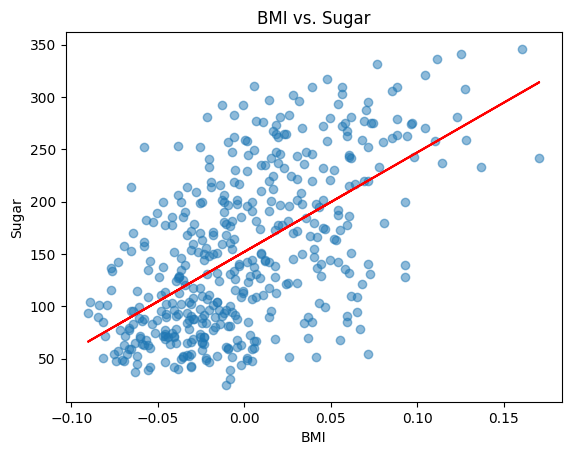

In [9]:
# 회귀선 그리기
y_pred = model.predict(X) # 예측값
plt.scatter(X,y, alpha=0.5)
plt.plot(X,y_pred, color='red')
plt.title('BMI vs. Sugar')
plt.xlabel('BMI')
plt.ylabel('Sugar')
plt.show()

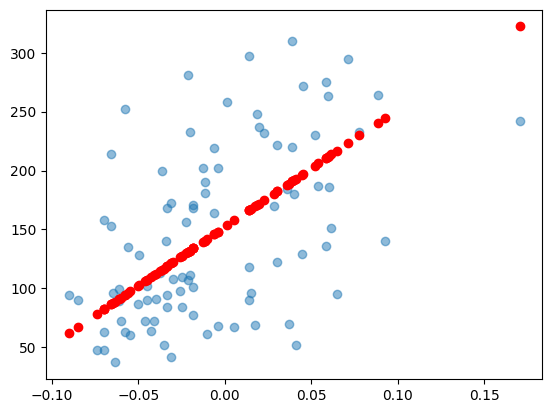

In [10]:
from sklearn.model_selection import train_test_split
# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 모델을 훈련 세트로 학습
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # 테스트 세트에 대한 예측값

plt.scatter(X_test, y_test, alpha=0.5, label='Actual') # 실제 값
plt.scatter(X_test, y_pred, color='red', label='Predicted') # 예측 값
plt.show()

### K-NN: Iris 

In [11]:
from sklearn.datasets import load_iris

# Iris 데이터셋 로드
iris = load_iris()

In [12]:
from sklearn.model_selection import train_test_split

# 입력과 출력을 설정한다. 
X = iris.data
y = iris.target

# 전체 데이터를 학습 데이터와 테스트 데이터 비율 (80:20)으로 분할한다. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(120, 4)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# 학습 단계
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# 테스트 단계
y_pred = knn.predict(X_test)

# 정확도 점수 출력
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

1.0


In [15]:
# 새로운 데이터 제시
#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

# 아직 보지 못한 새로운 데이터를 제시해보자. 
x_new = [[3,4,5,2],
         [5,4,2,2]] # 2개의 새로운 데이터
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


### SVM, SVC: Iris

In [16]:
from sklearn import svm
from sklearn import metrics

svc = svm.SVC(gamma=0.1, C=5) 

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

# 정확도 점수 출력
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

1.0


In [17]:
# 새로운 데이터 제시
x_new = [[3,4,5,2],
         [5,4,2,2]] # 2개의 새로운 데이터
y_predict = svc.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

virginica
setosa


### Decision Tree: Iris

In [18]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X, y = iris.data, iris.target

학습 데이터 정확도: 1.0
테스트 데이터 정확도: 0.9666666666666667


[Text(0.4, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.25, 'x[2] <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3

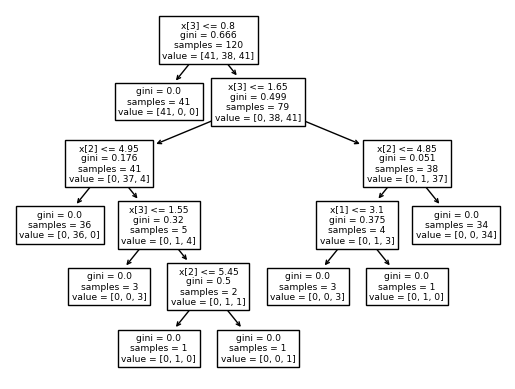

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.20)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_train)
print("학습 데이터 정확도:", accuracy_score(y_true = y_train, y_pred = y_pred))

y_pred = clf.predict(X_test)
print("테스트 데이터 정확도:", accuracy_score(y_true = y_test, y_pred=y_pred))

from sklearn.tree import plot_tree
plot_tree(clf)

### K-Means Clustering

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[16.66666667 15.83333333]
 [72.16666667 75.66666667]]
[0 0 0 0 0 0 1 1 1 1 1 1]


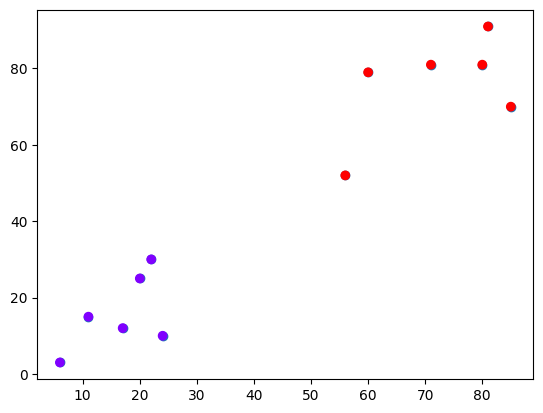

In [20]:
from sklearn.cluster import KMeans
import numpy as np

# X는 2차원 배열로, 각 행은 데이터 포인트를 나타냄
X = np.array([
     [6,3], [11,15], [17,12], [24,10], [20,25], [22,30],
     [85,70], [71,81], [60,79], [56,52], [81,91], [80,81]])

# X[:,0]: X의 모든 행에서 첫 번째 열, X[:,1]: X의 모든 행에서 두 번째 열
plt.scatter(X[:,0],X[:,1])

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# 각 클러스터의 중심 좌표
print(kmeans.cluster_centers_)

# 각 데이터 포인트가 속한 클러스터 레이블
print(kmeans.labels_)

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()

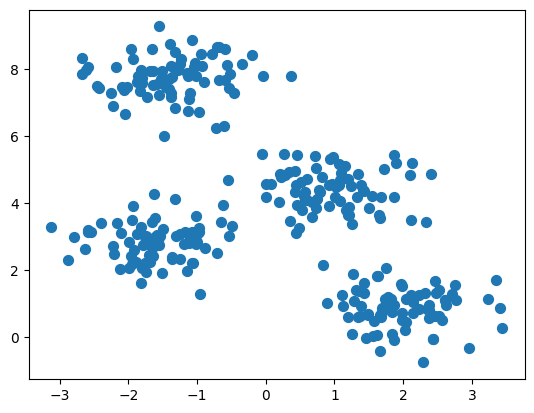

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50)


[3 1 0 1 3 3 2 0 1 1 2 1 0 1 3 0 0 3 2 2 3 3 0 2 2 0 3 0 2 0 1 1 0 1 1 1 1
 1 2 3 0 2 0 0 2 2 1 2 1 3 2 3 1 3 3 2 1 2 1 3 1 0 1 2 2 2 1 3 1 2 0 2 1 2
 2 1 2 0 3 1 3 0 3 3 1 0 3 0 1 1 0 3 1 2 2 0 3 3 0 2 1 3 1 3 0 3 3 0 1 0 2
 2 3 1 3 0 1 3 3 0 2 3 2 3 3 3 3 2 3 2 1 2 2 3 1 2 2 1 0 1 1 2 0 2 0 2 1 0
 1 1 1 0 1 0 3 2 1 2 3 0 1 0 0 3 0 2 2 0 3 0 0 1 3 0 2 1 3 3 0 2 3 0 2 2 0
 0 0 0 3 1 0 2 0 0 2 2 2 0 2 1 0 2 3 2 0 1 2 1 0 1 0 2 0 0 1 2 2 3 3 0 1 3
 3 2 3 2 0 1 1 0 0 1 0 3 2 0 3 2 1 2 3 0 3 1 1 1 1 2 2 1 0 2 3 0 2 2 2 3 3
 1 0 0 2 3 1 2 0 1 0 3 3 2 2 0 3 3 3 0 1 1 3 3 0 3 3 3 1 2 1 0 3 3 1 1 1 3
 3 0 1 2]


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


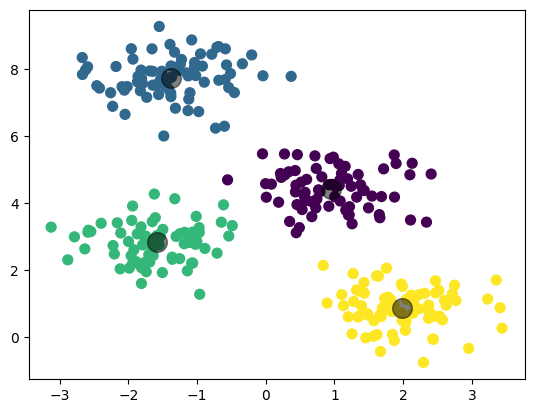

In [22]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# 클러스터 중심을 표시
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

### PCA 분석

In [26]:
# 붓꽃 데이터를 읽어 판다스 데이터로 구성

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  

In [27]:
# 표준화 전처리

from sklearn.preprocessing import StandardScaler
features = iris['feature_names']
print(features)
# : 모든 행을 선택, features는 지정한 열 이름들, .values는 선택한 데이터를 NumPy 배열로 변환
# df에서 features에 해당하는 열을 뽑아 numpy 배열로 변환
X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
X = StandardScaler().fit_transform(X)

print(X)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e

In [28]:
# 표준화된 붓꽃 데이터에 PCA를 적용

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result  = pca.fit_transform(X)
principalDf = pd.DataFrame(data = pca_result, columns = ['PC1', 'PC2'])
principalDf, df['target']

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
print(finalDf)

          PC1       PC2  target
0   -2.264703  0.480027     0.0
1   -2.080961 -0.674134     0.0
2   -2.364229 -0.341908     0.0
3   -2.299384 -0.597395     0.0
4   -2.389842  0.646835     0.0
..        ...       ...     ...
145  1.870503  0.386966     2.0
146  1.564580 -0.896687     2.0
147  1.521170  0.269069     2.0
148  1.372788  1.011254     2.0
149  0.960656 -0.024332     2.0

[150 rows x 3 columns]


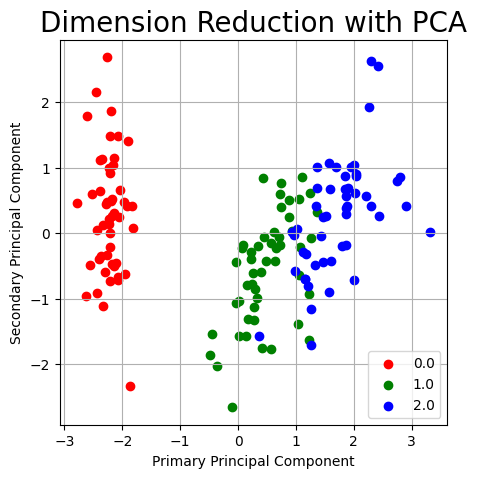

In [29]:
# 2차원 공간으로 축소된 데이터를 가시화

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Primary Principal Component')
ax.set_ylabel('Secondary Principal Component')
ax.set_title('Dimension Reduction with PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    idx = finalDf['target'] == target
    ax.scatter(finalDf.loc[idx, 'PC1'] , finalDf.loc[idx, 'PC2']
               , c = color)
ax.legend(targets)
ax.grid()

### 퍼셉트론 프로그래밍

In [31]:
from sklearn.linear_model import Perceptron

# 훈련 집합 구축
X=[[0,0],[0,1],[1,0],[1,1]]
y=[-1,1,1,1]

# fit 함수로 Perceptron 학습
p=Perceptron()
p.fit(X,y)

print("학습된 퍼셉트론의 매개변수: ",p.coef_,p.intercept_) # p.coef_는 가중치, p.intercept_는 절편
print("훈련집합에 대한 예측: ",p.predict(X))
print("정확률 측정: ",p.score(X,y)*100,"%")

학습된 퍼셉트론의 매개변수:  [[2. 2.]] [-1.]
훈련집합에 대한 예측:  [-1  1  1  1]
정확률 측정:  100.0 %


In [32]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

In [37]:
# x_train, x_test은 64차원 벡터, y_train, y_test는 0~9 사이의 숫자 레이블 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1078, 64), (719, 64), (1078,), (719,))

In [40]:
# fit 함수로 Perceptron 학습
p=Perceptron(max_iter=100,eta0=0.001,verbose=0)
p.fit(x_train,y_train) # digit 데이터로 모델링

res=p.predict(x_test) # 테스트 집합으로 예측

# 혼동 행렬
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i] # 예측이 맞은 경우의 수를 합산
accuracy=no_correct/len(res) # 정확률 계산
print("테스트 집합에 대한 정확률은 ", accuracy*100, "%입니다.")

[[67.  0.  0.  1.  0.  1.  0.  0.  0.  0.]
 [ 0. 71.  2.  0.  0.  0.  2.  0.  4.  0.]
 [ 0.  0. 63.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. 59.  0.  0.  0.  2.  1.  1.]
 [ 1.  1.  0.  0. 66.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  2.  0. 75.  0.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.  0. 73.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 70.  0.  0.]
 [ 0.  2.  0.  2.  2.  2.  1.  0. 64.  0.]
 [ 0.  0.  0.  0.  1.  1.  0.  1.  4. 72.]]
테스트 집합에 대한 정확률은  94.57579972183588 %입니다.


다층 퍼셉트론: digit

In [41]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [42]:
# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1078, 64), (719, 64), (1078,), (719,))

In [44]:
# MLP 분류기 모델을 학습
mlp=MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd',verbose=True)
mlp.fit(x_train,y_train)

res=mlp.predict(x_test) # 테스트 집합으로 예측

# 혼동 행렬
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은 ", accuracy*100, "%입니다.")

Iteration 1, loss = 2.02566337
Iteration 2, loss = 0.31255177
Iteration 3, loss = 0.19860637
Iteration 4, loss = 0.15087031
Iteration 5, loss = 0.12388851
Iteration 6, loss = 0.09886477
Iteration 7, loss = 0.08911368
Iteration 8, loss = 0.07441360
Iteration 9, loss = 0.06653413
Iteration 10, loss = 0.06171913
Iteration 11, loss = 0.05433126
Iteration 12, loss = 0.05209026
Iteration 13, loss = 0.04740871
Iteration 14, loss = 0.04291463
Iteration 15, loss = 0.04139197
Iteration 16, loss = 0.03752006
Iteration 17, loss = 0.03373321
Iteration 18, loss = 0.03296899
Iteration 19, loss = 0.03009602
Iteration 20, loss = 0.02897487
Iteration 21, loss = 0.02701553
Iteration 22, loss = 0.02581547
Iteration 23, loss = 0.02404046
Iteration 24, loss = 0.02361431
Iteration 25, loss = 0.02221663
Iteration 26, loss = 0.02044407
Iteration 27, loss = 0.01982738
Iteration 28, loss = 0.01900690
Iteration 29, loss = 0.01848791
Iteration 30, loss = 0.01810462
Iteration 31, loss = 0.01726823
Iteration 32, los

In [24]:
# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# MLP 분류기 모델을 학습
mlp=MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd',verbose=True)
mlp.fit(x_train,y_train)

res=mlp.predict(x_test) # 테스트 집합으로 예측

# 혼동 행렬
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은 ", accuracy*100, "%입니다.")

Iteration 1, loss = 2.01110147
Iteration 2, loss = 0.34362461
Iteration 3, loss = 0.20937290
Iteration 4, loss = 0.16455878
Iteration 5, loss = 0.13736480
Iteration 6, loss = 0.11845374
Iteration 7, loss = 0.10325743
Iteration 8, loss = 0.08808226
Iteration 9, loss = 0.07525176
Iteration 10, loss = 0.06926798
Iteration 11, loss = 0.06067452
Iteration 12, loss = 0.05672458
Iteration 13, loss = 0.05130710
Iteration 14, loss = 0.04795216
Iteration 15, loss = 0.04599659
Iteration 16, loss = 0.04047763
Iteration 17, loss = 0.03749261
Iteration 18, loss = 0.03421210
Iteration 19, loss = 0.03277759
Iteration 20, loss = 0.03164504
Iteration 21, loss = 0.02919426
Iteration 22, loss = 0.02768771
Iteration 23, loss = 0.02599514
Iteration 24, loss = 0.02611518
Iteration 25, loss = 0.02349175
Iteration 26, loss = 0.02371478
Iteration 27, loss = 0.02110889
Iteration 28, loss = 0.02117655
Iteration 29, loss = 0.01996884
Iteration 30, loss = 0.01920679
Iteration 31, loss = 0.01916320
Iteration 32, los

텐서플로를 활용한 MLP

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 신경망 구조 설계
mlp=Sequential()
# actication, kernel_initializer, bias_initializer는 모두 기본값으로 설정
# kernel_initializer는 가중치 초기화하여 기울기 소실이나 폭발 문제를 방지한다. 
mlp.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

# 신경망 학습
# 옵티마이저로는 Adam을 사용했으나 Adagrad(), RMSprop(), SGD() 등 다른 것도 사용 가능
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망의 정확률 측정
res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

In [9]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
mnist=fetch_openml('mnist_784')
mnist.data=mnist.data/255.0
x_train=mnist.data[:60000]; x_test=mnist.data[60000:]
y_train=np.int16(mnist.target[:60000]); y_test=np.int16(mnist.target[60000:])

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# MLP 분류기 모델을 학습
mlp=MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=512,max_iter=300,solver='adam',verbose=True)
mlp.fit(x_train,y_train)

# 테스트 집합으로 예측
res=mlp.predict(x_test)

# 혼동 행렬
conf=np.zeros((10,10),dtype=np.int16)
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은", accuracy*100, "%입니다.")

여러 손실함수 사용

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 평균제곱오차를 사용한 모델
dmlp_mse=Sequential()
dmlp_mse.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_mse.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_mse.add(Dense(units=n_output,activation='softmax'))
dmlp_mse.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_mse=dmlp_mse.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 교차 엔트로피를 사용한 모델
dmlp_ce=Sequential()
dmlp_ce.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_ce.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_ce.add (Dense(units=n_output,activation='softmax'))
dmlp_ce.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_ce=dmlp_ce.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 두 모델의 정확률 비교
res_mse=dmlp_mse.evaluate(x_test,y_test,verbose=0)
print("평균제곱오차의 정확률은",res_mse[1]*100)
res_ce=dmlp_ce.evaluate(x_test,y_test,verbose=0)
print("교차 엔트로피의 정확률은",res_ce[1]*100)

# 하나의 그래프에서 두 모델을 비교
import matplotlib.pyplot as plt
plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])
plt.title('Model accuracy comparison between MSE and cross entropy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_mse','Validation_mse','Train_ce','Validation_ce'], loc='best')
plt.grid()
plt.show()

텐서플로를 활용해서 CNN 구현

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)= mnist.load_data() # MNIST 데이터셋을 읽어옴
x_train=x_train.reshape(60000,28,28,1) # 총 60000개의 이미지, 28x28픽셀, 1채널(흑백)
x_test=x_test.reshape(10000,28,28,1)   # 총 10000개의 이미지, 28x28픽셀, 1채널(흑백)
x_train=x_train.astype(np.float32)/255.0 # float32형으로 변환 후 픽셀값을 0~1사이로 정규화
x_test=x_test.astype(np.float32)/255.0  # float32형으로 변환 후 픽셀값을 0~1사이로 정규화
y_train=tf.keras.utils.to_categorical(y_train,10) # 0~9까지의 숫자이므로 10개의 클래스
y_test=tf.keras.utils.to_categorical(y_test,10) # 0~9까지의 숫자이므로 10개의 클래스

In [ ]:
# LeNet-5 신경망 모델 설계
cnn=Sequential()
# 3개의 합성곱층(Conv2D)과 2개의 풀링층(Maxpooling2D)으로 구성된 LeNet-5 신경망 모델을 설계
# 숫자 의미 : (필터 개수, (필터 크기)), padding='same' : 입력과 출력의 크기를 같게 유지
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
# MaxPooling을 사용하여 2x2 크기의 필터로 2배로 다운샘플링
cnn.add(MaxPooling2D(pool_size=(2,2))) # 풀링층은 2x2 크기의 필터를 사용하여 2배로 다운샘플링
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
# MUlti Layer Perceptron(MLP) : Fully Connected Layer
cnn.add(Flatten()) # 3차원 데이터를 1차원으로 변환
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

규제 기법을 추가하여 CNN 구현

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # CIFAR-10 데이터셋을 읽어옴
# train : 50000개, test: 10000개
x_train=x_train.astype(np.float32)/255.0 # float32형으로 변환 후 픽셀값을 0~1사이로 정규화
x_test=x_test.astype(np.float32)/255.0  # float32형으로 변환 후 픽셀값을 0~1사이로 정규화
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 213s 1us/step


In [8]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# 신경망 모델 설계
# 4개의 합성곱층(Conv2D)과 3개의 풀링층(Maxpooling2D)으로 구성된 신경망 모델을 설계
# 규제화 기법으로 드롭아웃(Dropout)과 데이터 증대 기법을 사용
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습(영상 증대기 활용)
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
batch_siz=128
# 데이터 증대기(ImageDataGenerator)를 사용하여 학습 데이터에 대한 변형을 생성
# width_shift_range : 수평 이동 범위, height_shift_range : 수직 이동 범위
# horizontal_flip : 수평 반전 여부
generator=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
hist=cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=50,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

dropout 비율을 달리 적용

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 하이퍼 매개변수 설정
batch_siz=128 # 배치 크기
n_epoch=10 # 에포크 수
k=5 # k-겹 교차 검증

# 드롭아웃 비율에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(dropout_rate):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train): # KFold를 사용하여 훈련 집합과 검증 집합으로 분할
        # 훈련 집합과 검증 집합으로 분할
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]

        # 신경망 모델 설계
        cnn=Sequential()
        cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
        cnn.add(Conv2D(32,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[0]))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[1]))
        cnn.add(Flatten())
        cnn.add(Dense(512,activation='relu'))
        cnn.add(Dropout(dropout_rate[2]))
        cnn.add(Dense(10,activation='softmax'))

        # 신경망 모델을 학습하고 평가하기
        # loss : 크로스 엔트로피 손실 함수, optimizer : Adam optimizer 사용
        cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
        cnn.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=0)
        accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
    return accuracy

# 드롭아웃 비율을 달리하며 신경망을 평가
acc_without_dropout=cross_validation([0.0,0.0,0.0])
acc_with_dropout=cross_validation([0.25,0.25,0.5]) # 드롭아웃 비율을 0.25, 0.25, 0.5로 설정

print("드롭아웃 적용 안 할 때:",np.array(acc_without_dropout).mean()) # 드롭아웃 적용 안 할 때 평균 정확률
print("드롭아웃 적용할 때:",np.array(acc_with_dropout).mean()) # 드롭아웃 적용할 때 평균 정확률

import matplotlib.pyplot as plt

# 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_without_dropout,acc_with_dropout],labels=["Without Dropout","With Dropout"])

배치 사이즈와 에폭 수 조정

In [ ]:
# 배치 사이즈와 에폭 수에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation_with_batch_and_epoch(batch_size, epochs):
  accuracy = []
  for train_index, val_index in KFold(k).split(x_train):  # KFold를 사용하여 훈련 집합과 검증 집합으로 분할
    # 훈련 집합과 검증 집합으로 분할
    xtrain, xval = x_train[train_index], x_train[val_index]
    ytrain, yval = y_train[train_index], y_train[val_index]

    # 신경망 모델 설계
    cnn = Sequential()
    cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    cnn.add(Conv2D(32, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.25))
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.25))
    cnn.add(Flatten())
    cnn.add(Dense(512, activation='relu'))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(10, activation='softmax'))

    # 신경망 모델을 학습하고 평가하기
    cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    cnn.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, verbose=0)
    accuracy.append(cnn.evaluate(xval, yval, verbose=0)[1])
  return accuracy


In [ ]:
# 배치 사이즈와 에폭 수를 저장하는 리스트
batch_sizes = [64, 128, 256]
epochs_list = [10, 20, 5]

  # 각 배치 사이즈와 에폭 수에 대해 신경망을 평가
accuracies = []
for batch_size, epochs in zip(batch_sizes, epochs_list):
  acc = cross_validation_with_batch_and_epoch(batch_size=batch_size, epochs=epochs)
  accuracies.append((batch_size, epochs, np.array(acc).mean()))

  # 결과 출력
for batch_size, epochs, mean_acc in accuracies:
  print(f"배치 사이즈: {batch_size}, 에폭 수: {epochs}, 평균 정확률: {mean_acc}")

  # 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([cross_validation_with_batch_and_epoch(batch_size=batch, epochs=epoch) for batch, epoch in zip(batch_sizes, epochs_list)],
      labels=[f"Batch {batch}, Epoch {epoch}" for batch, epoch in zip(batch_sizes, epochs_list)])
plt.title("Batch Size and Epoch Comparison")
plt.ylabel("Accuracy")
plt.show()